In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import sklearn.datasets as datasets

import mlgrad.pca as pca

In [124]:
X0, Y0 = datasets.load_digits(return_X_y=True)

In [170]:
I1 = (Y0 == 3)
X = X0[I1]
Y = Y0[I1]
N = len(X)

In [193]:
alpha = 0.95
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.01))
amf = af.averaging_function("AM")

[0.00000000e+00 6.44808743e-01 8.38797814e+00 1.41693989e+01
 1.42240437e+01 7.48087432e+00 7.86885246e-01 5.46448087e-03
 1.09289617e-02 4.20765027e+00 1.26557377e+01 8.98907104e+00
 1.12841530e+01 1.19945355e+01 2.10928962e+00 1.63934426e-02
 5.46448087e-03 2.22404372e+00 3.70491803e+00 3.10928962e+00
 1.20273224e+01 9.32240437e+00 8.14207650e-01 0.00000000e+00
 0.00000000e+00 2.95081967e-01 1.45901639e+00 8.93989071e+00
 1.42732240e+01 5.60655738e+00 8.19672131e-02 0.00000000e+00
 0.00000000e+00 6.01092896e-02 1.04918033e+00 5.63934426e+00
 1.20491803e+01 1.12786885e+01 2.19672131e+00 0.00000000e+00
 0.00000000e+00 4.26229508e-01 1.39890710e+00 9.67213115e-01
 4.40983607e+00 1.21366120e+01 6.31693989e+00 0.00000000e+00
 0.00000000e+00 8.68852459e-01 7.11475410e+00 6.22950820e+00
 8.26229508e+00 1.30163934e+01 5.92896175e+00 6.55737705e-02
 0.00000000e+00 5.02732240e-01 9.31693989e+00 1.46502732e+01
 1.39726776e+01 8.67213115e+00 1.40983607e+00 6.55737705e-02]


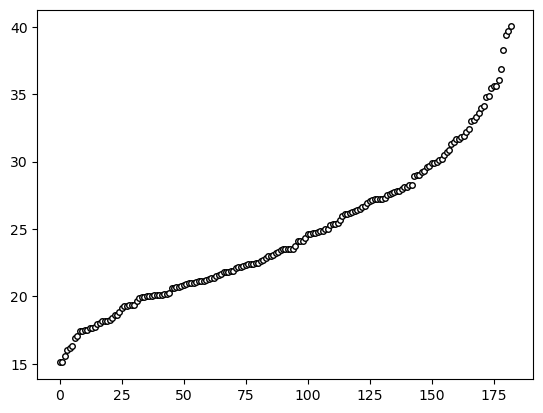

In [194]:
c0 = pca.location(X)
print(c0)
plt.plot(sorted(pca.distance_center(X, c0)), marker='o', markersize=4, color='w', mec='k')
plt.show()

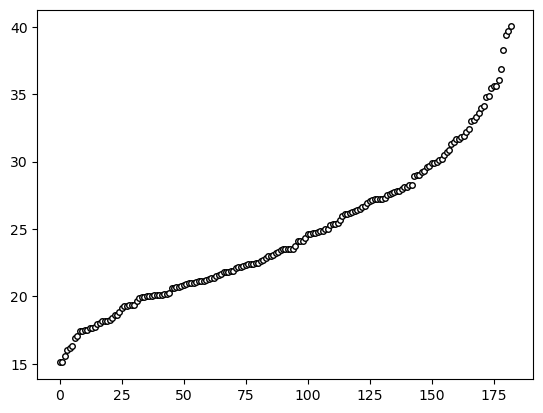

In [195]:
c = pca.robust_location(X, wma)
plt.plot(sorted(pca.distance_center(X, c)), marker='o', markersize=4, color='w', mec='k')
plt.show()

In [196]:
print(np.abs(c-c0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


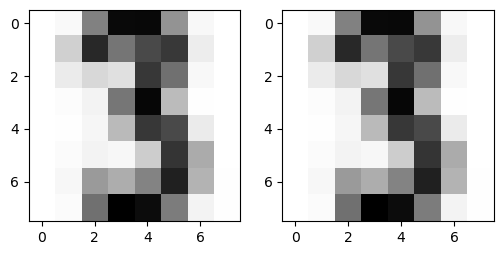

In [197]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(c0.reshape(8,8), cmap=plt.cm.Greys)
plt.subplot(1,2,2)
plt.imshow(c.reshape(8,8), cmap=plt.cm.Greys)
plt.show()

In [198]:
X1 = X - c
X1_0 = X - c0

In [199]:
a1_0, L1_0 = pca.find_pc(X1_0)
print(L1_0, a1_0)

136.98331880714883 [ 0.00000000e+00  2.87360999e-02  1.02570587e-01  3.32841795e-02
  6.32293514e-02  2.27305146e-01  8.78013316e-02  1.17579204e-03
 -5.95431951e-04 -6.57940373e-02 -9.00427117e-02 -2.23537253e-02
 -5.73055614e-02  2.07467871e-01  1.86281700e-01  1.94750323e-03
 -3.57935729e-04 -1.11400921e-01 -1.57181784e-01 -4.42125370e-02
 -6.52390371e-02  2.28825126e-01  7.37690149e-02  0.00000000e+00
  0.00000000e+00 -1.97236407e-02 -2.82878982e-02 -5.94675495e-02
 -4.93434049e-02 -2.69366981e-02 -2.15802804e-03  0.00000000e+00
  0.00000000e+00 -4.80307923e-03  4.48910002e-02  1.39471177e-01
  1.18088093e-01 -2.94631263e-01 -1.21156457e-01  0.00000000e+00
  0.00000000e+00 -3.53389470e-02 -7.43109776e-02  1.20992692e-01
  3.86917007e-01 -1.11357719e-02 -2.92839506e-01  0.00000000e+00
  0.00000000e+00 -3.32312553e-02 -2.33919781e-01 -3.16995288e-02
  2.61478874e-01 -3.96626464e-02 -2.83175306e-01 -6.13453549e-03
  0.00000000e+00  3.15725544e-02  1.42706942e-01  2.40961596e-02
 -1.32

In [200]:
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)

129.28518019524586 [ 0.00000000e+00 -2.51674969e-02 -8.37767250e-02 -1.12299022e-02
 -6.07612957e-02 -2.43533587e-01 -9.23155519e-02 -1.19853228e-03
  6.09218713e-04  6.59212770e-02  6.83442268e-02  1.93779966e-02
  8.22207906e-02 -2.16466690e-01 -2.03571650e-01 -2.18483669e-03
  3.10545064e-04  7.96213352e-02  1.13111206e-01  6.84348955e-02
  9.11557858e-02 -2.44359838e-01 -8.66259704e-02  0.00000000e+00
  0.00000000e+00  6.13458439e-03  2.91827805e-02  1.19355087e-01
  4.29687236e-02  4.58819554e-03 -2.58616973e-04  0.00000000e+00
  0.00000000e+00  2.59821445e-03 -3.22189184e-02 -1.09348507e-01
 -1.47881510e-01  2.87558753e-01  1.21299246e-01  0.00000000e+00
  0.00000000e+00  3.49303637e-02  1.13933361e-01 -1.02419602e-01
 -3.75472871e-01 -6.32513313e-03  2.90689649e-01  0.00000000e+00
  0.00000000e+00  3.76360085e-02  2.45926403e-01  1.81740063e-02
 -2.52589080e-01  5.97377255e-02  2.77107278e-01  2.43087870e-03
  0.00000000e+00 -3.08295309e-02 -1.28639141e-01 -1.21266941e-02
  1.36

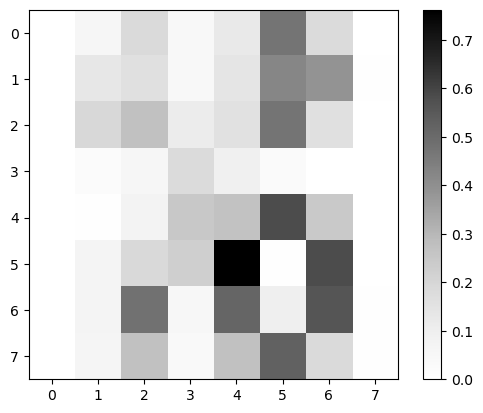

In [201]:
cb = plt.imshow(np.abs(a1 - a1_0).reshape(8,8), cmap=plt.cm.Greys)
plt.colorbar(cb)
plt.show()

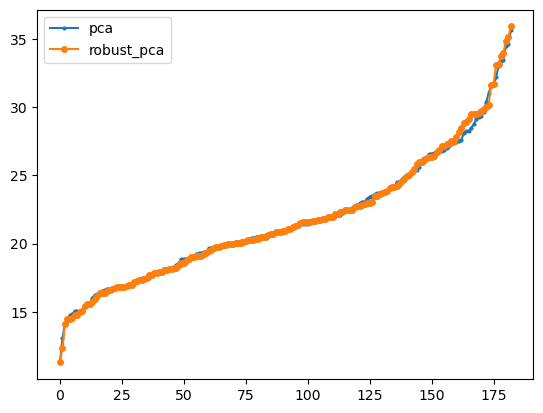

In [202]:
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=2, label='pca')
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, label='robust_pca')
plt.legend()
plt.show()

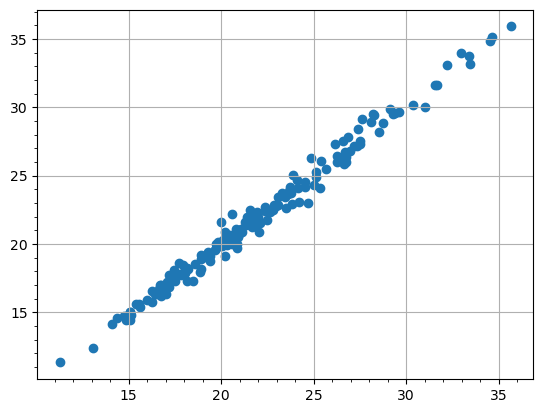

In [203]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [209]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

In [210]:
a2_0, L2_0 = pca.find_pc(X2_0)
print(L2_0, a2_0)

93.1480165524828 [ 0.00000000e+00  1.72698722e-02  1.30613385e-01  8.06337046e-02
 -8.23091953e-02 -2.52213443e-01 -3.51768983e-02  3.20893462e-04
 -2.82839180e-04  3.72085857e-02  4.14048133e-02 -1.69901167e-03
  2.54595395e-01 -2.85297550e-01 -1.32046678e-01 -8.14096788e-04
 -6.58777681e-04 -8.01169765e-02 -5.19064265e-02  2.24095072e-01
  2.09449503e-01 -3.59935432e-01 -6.88628052e-02  0.00000000e+00
  0.00000000e+00 -1.72617853e-02  1.20663096e-01  4.07875354e-01
 -1.23162485e-01 -2.42240234e-01 -8.79354444e-03  0.00000000e+00
  0.00000000e+00 -8.47829558e-03  9.59982632e-02  3.35236845e-01
  8.03729099e-02 -4.82762150e-02 -2.19246771e-02  0.00000000e+00
  0.00000000e+00  8.44953067e-03 -5.55682850e-03  6.12463994e-02
  8.92471473e-02  6.17017567e-02 -6.37132237e-02  0.00000000e+00
  0.00000000e+00  3.96822229e-02  2.20242898e-03 -4.45735306e-02
  9.35701047e-02  1.04819451e-01 -1.08240723e-01 -7.20162768e-03
  0.00000000e+00  9.82921420e-03  1.42994412e-01  7.46373861e-02
 -2.5643

In [211]:
# wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt((N-7)/N, 0.1))
a2, L2 = pca.find_robust_pc(X2, wma)
print(L2, a2)

84.01199991939252 [ 0.00000000e+00  2.72239390e-02  2.16714653e-01  1.33892823e-01
 -8.06744243e-02 -2.38243645e-01 -3.99365626e-02  1.67325400e-04
 -4.44035727e-04  2.66019638e-02  4.23716383e-03 -5.72566675e-02
  2.43738372e-01 -2.51005558e-01 -1.02620149e-01 -5.96828081e-04
 -6.42116438e-04 -1.45444987e-01 -1.77514822e-01  1.73334003e-01
  2.05795338e-01 -2.89706375e-01 -4.96439175e-02  0.00000000e+00
  0.00000000e+00 -4.90883769e-02  3.89188969e-02  4.02021795e-01
 -7.32801868e-02 -1.75433539e-01 -4.75420858e-03  0.00000000e+00
  0.00000000e+00 -1.49801522e-03  7.61937855e-02  3.09434142e-01
  6.48731678e-02  3.13078939e-03 -8.09261691e-03  0.00000000e+00
  0.00000000e+00  1.91827732e-02  2.22380035e-02  5.87176685e-02
  8.06987932e-02  4.92680638e-02 -5.41125157e-02  0.00000000e+00
  0.00000000e+00  5.04785015e-02  1.02442131e-02 -3.92284076e-02
  1.22354296e-01  1.25842075e-01 -1.54237531e-01 -1.10514523e-02
  0.00000000e+00  1.99825914e-02  2.43990726e-01  1.09147802e-01
 -5.007

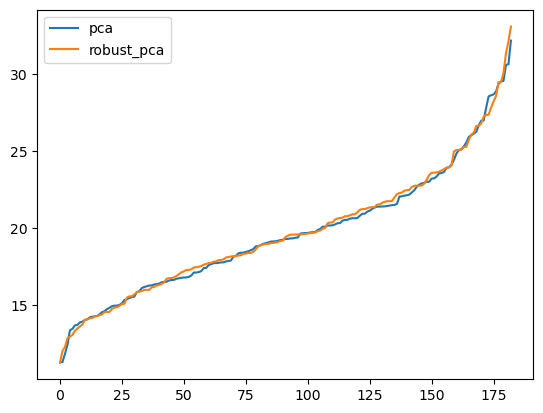

In [212]:
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), label='pca')
plt.plot(sorted(pca.distance_line(X2, a2)), label='robust_pca')
plt.legend()
plt.show()

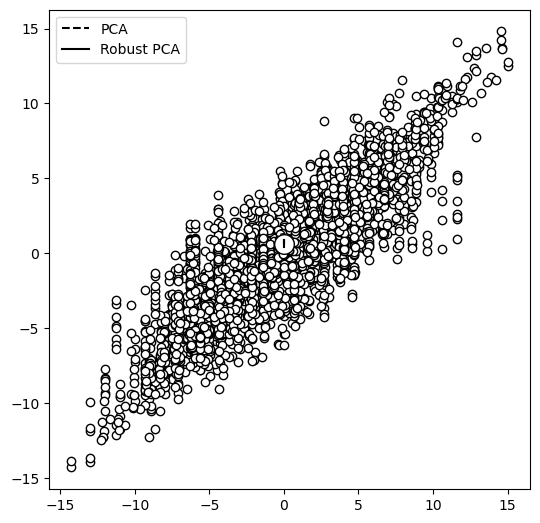

In [208]:
aa = 16/9
plt.figure(figsize=(5.5,3*aa))
plt.scatter(X1, X2, c='w', edgecolors='k')
plt.scatter([c0[0]], [c0[1]], s=200, c='w', edgecolors='k', linestyle='--')
plt.scatter([c[0]], [c[1]], s=200, c='w', edgecolors='k')
plt.plot([c0[0]+10*a1_0[0], c0[0], c0[0]+10*a2_0[0]], [c0[1]+10*a1_0[1], c0[1], c0[1]+10*a2_0[1]], 
         c='k', linestyle='--', label='PCA')
plt.plot([c[0]+10*a1[0], c[0], c[0]+10*a2[0]], [c[1]+10*a1[1], c[1], c[1]+10*a2[1]], 
         c='k', label='Robust PCA')
plt.legend()
# plt.xlabel('log.Te')
# plt.ylabel('log.light')
plt.tight_layout()
# plt.savefig('fig/robust_pca_starsCYG.eps')
plt.show()

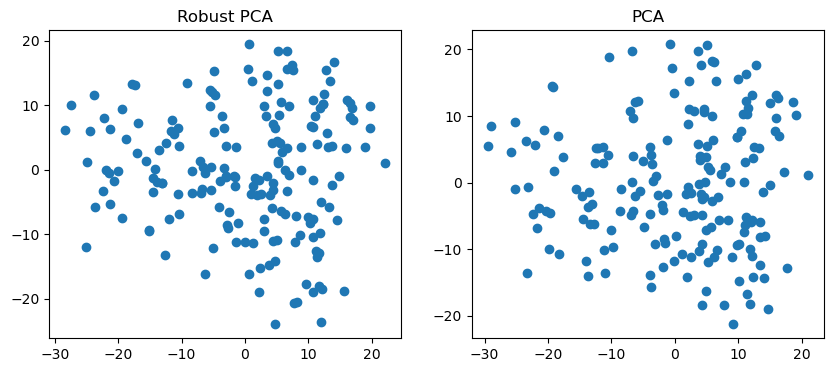

In [214]:
U1 = X1 @ a1
U2 = X1 @ a2

U1_0 = X1_0 @ a1_0
U2_0 = X1_0 @ a2_0

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2)
plt.subplot(1,2,2)
plt.title('PCA')
plt.scatter(-U1_0, U2_0)
# plt.savefig('fig/robust_pca_starsCYG_transformed.eps')
plt.show()

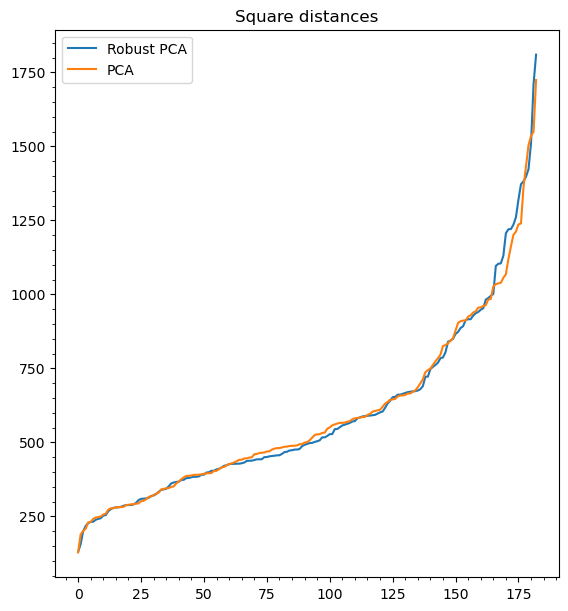

In [215]:
D = (X1 * X1).sum(axis=1) -  U1 * U1 + U2 * U2
D_0 = (X1_0 * X1_0).sum(axis=1) - U1_0 * U1_0 + U2_0 * U2_0

plt.figure(figsize=(6.5,4*aa))
plt.title('Square distances')
plt.plot(sorted(D), label='Robust PCA')
plt.plot(sorted(D_0), label='PCA')
plt.minorticks_on()
plt.legend()
# plt.savefig('fig/robust_pca_starsCYG_SD.eps')
plt.show()

In [21]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [22]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=(N-6)/N)
S = robust_scatter_matrix(XY1, wma)
print(S)

TypeError: averaging_function() got an unexpected keyword argument 'alpha'

In [ ]:
L, A = np.linalg.eig(S)
print(A)
np.dot(A[0], A[1])

In [ ]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_sk = PCA()
pca_sk.fit(XY0)
AA = pca_sk.components_
print(AA)
pca_sk.mean_

In [ ]:
plt.figure(figsize=(7/(1920/1080),5))
plt.scatter(XY1[:,0], XY1[:,1], c='w', edgecolors='k')
plt.scatter([0], [0], s=81, c='b')
plt.plot([-AA[0,0], 0, AA[0,0]], [-AA[1,0], 0, AA[1,0]], linestyle='--', label='1 (sk)')
plt.plot([-AA[0,1], 0, AA[0,1]], [-AA[1,1], 0, AA[1,1]], linestyle='--', label='2 (sk)')
plt.plot([-A[0,0], 0, A[0,0]], [-A[1,0], 0, A[1,0]], label='1')
plt.plot([-A[0,1], 0, A[0,1]], [-A[1,1], 0, A[1,1]], label='2')
plt.legend()
plt.show()